# LayerVis example

This notebook shows of the `layervis` package and some of the quick visualisations that can be performed.

## Usage

Create an instance of `LayerVis` passing your model to the constructor. The optional `verbose` argument prints the model summary when it renders a layer.

There are three main methods:

* `all_layers`
* `all_up_to`
* `cumulative_layers`

Given a model with two convolutional layers `A` and `B`:

* `all_layers` renders the combined effect of every layer (e.g. `A` then `B`)
* `all_up_to` renders the combined effect of every layer up to the Nth layer (e.g. `A` when `n == 2`)
* `cumulative_layers` renders the effect of each layer as it is added (e.g. `A` then `A + B`)

In [6]:
%matplotlib inline

%load_ext autoreload
%autoreload 1

%aimport layervis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from keras.models import load_model, Sequential
from keras.layers import Conv2D
import numpy as np
from PIL import Image

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1)),
    Conv2D(32, (11, 11), input_shape=(128, 128, 1)),
])


image_data = np.expand_dims(np.array(Image.open('cat.jpg').resize((128, 128)).convert('L')), axis=-1)

# Visualising an image quickly

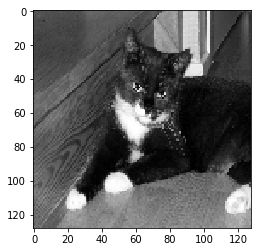

In [23]:
layervis._show_image(image_data)

# Visualising the combined effect of all layers of a model

Up to a specific layer number

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 116, 116, 32)      123936    
Total params: 124,256
Trainable params: 124,256
Non-trainable params: 0
_________________________________________________________________


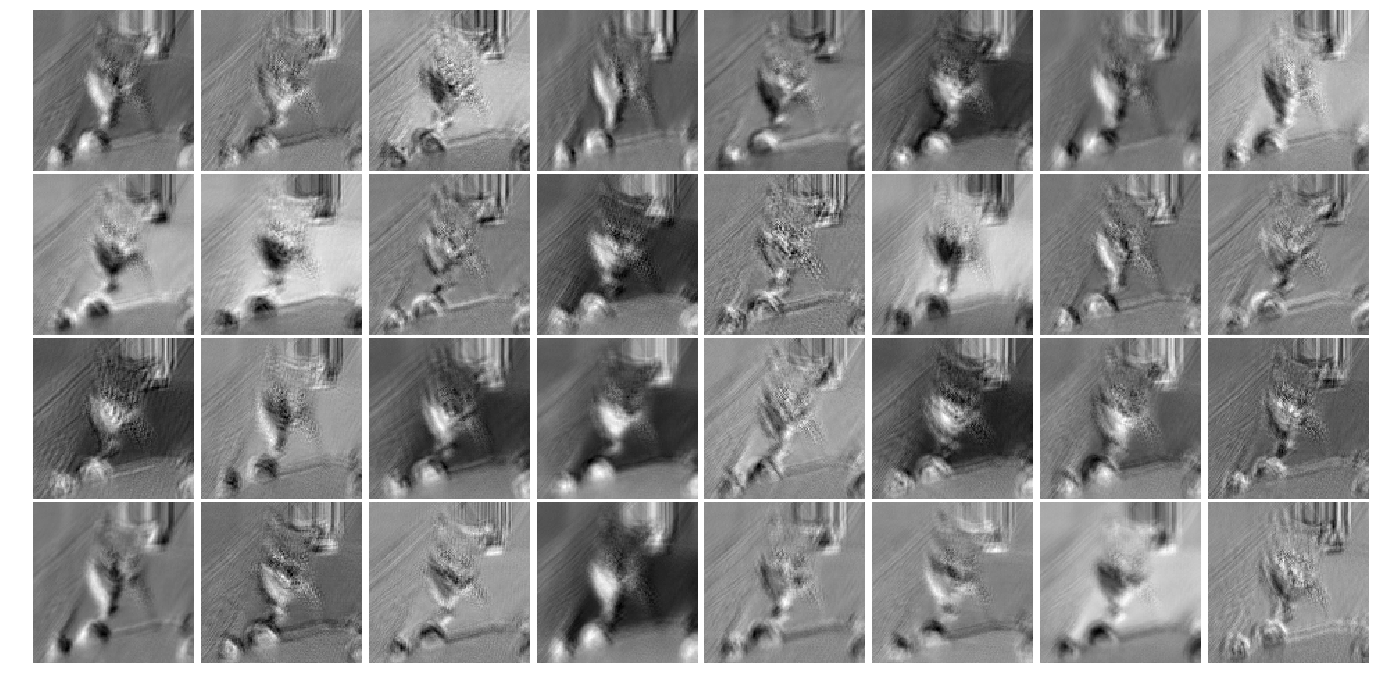

In [27]:
vis = layervis.LayerVis(model, verbose=True)
vis.all_layers(image_data);

# Visualising the cumulative effect of adding layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 116, 116, 32)      123936    
Total params: 124,256
Trainable params: 124,256
Non-trainable params: 0
_________________________________________________________________


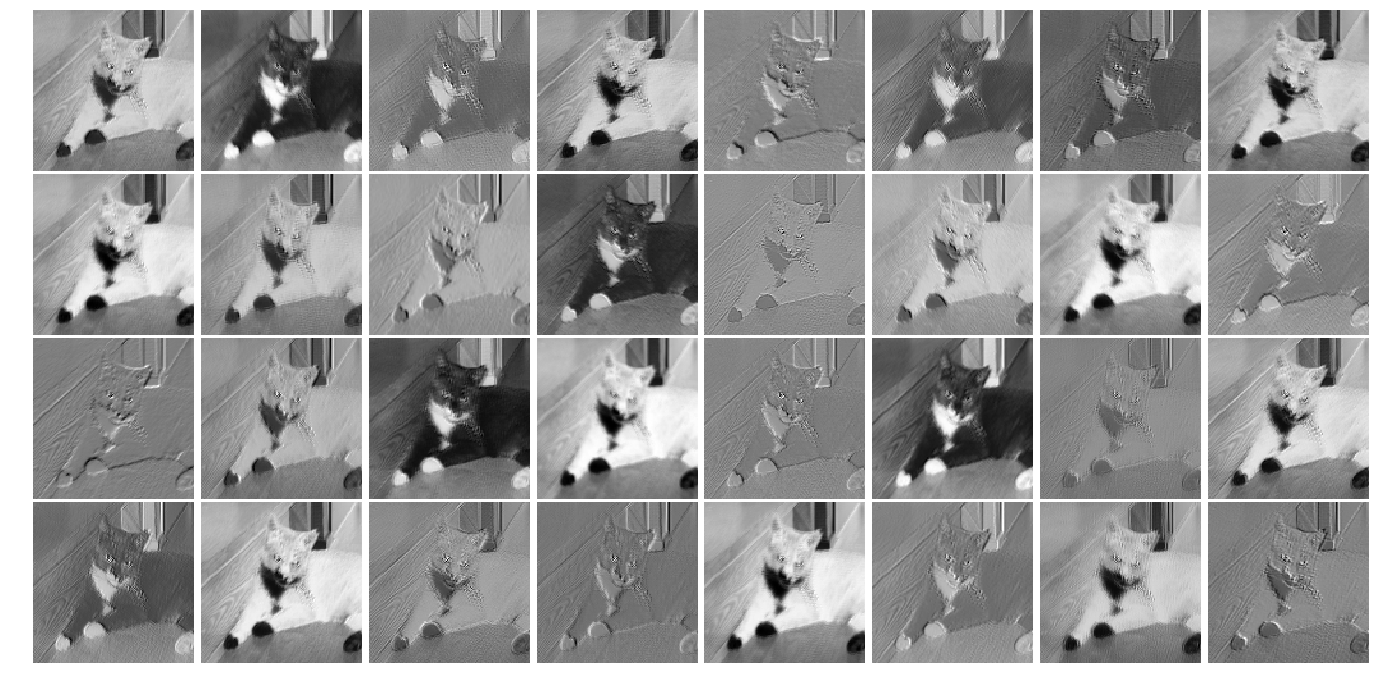

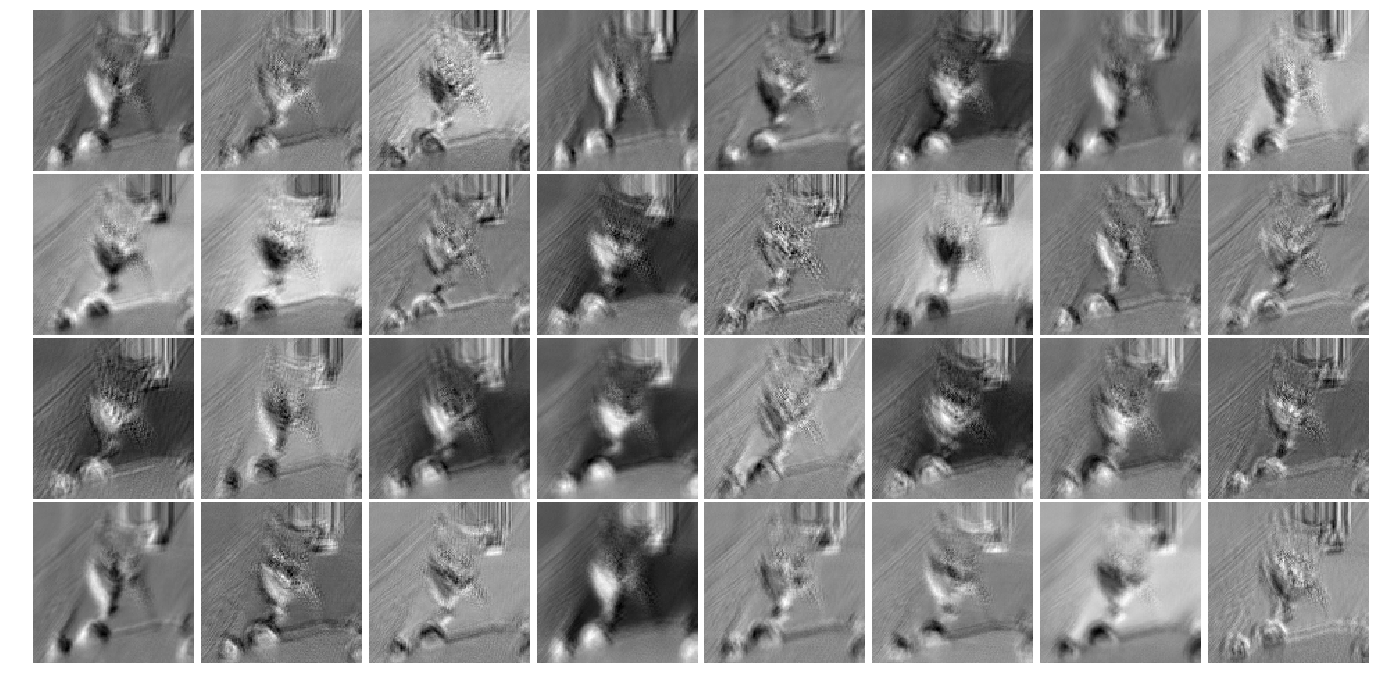

In [25]:
vis = layervis.LayerVis(model, verbose=True)
vis.cumulative_layers(image_data);

# Visualising a model up to a specific layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 116, 116, 32)      123936    
Total params: 124,256
Trainable params: 124,256
Non-trainable params: 0
_________________________________________________________________


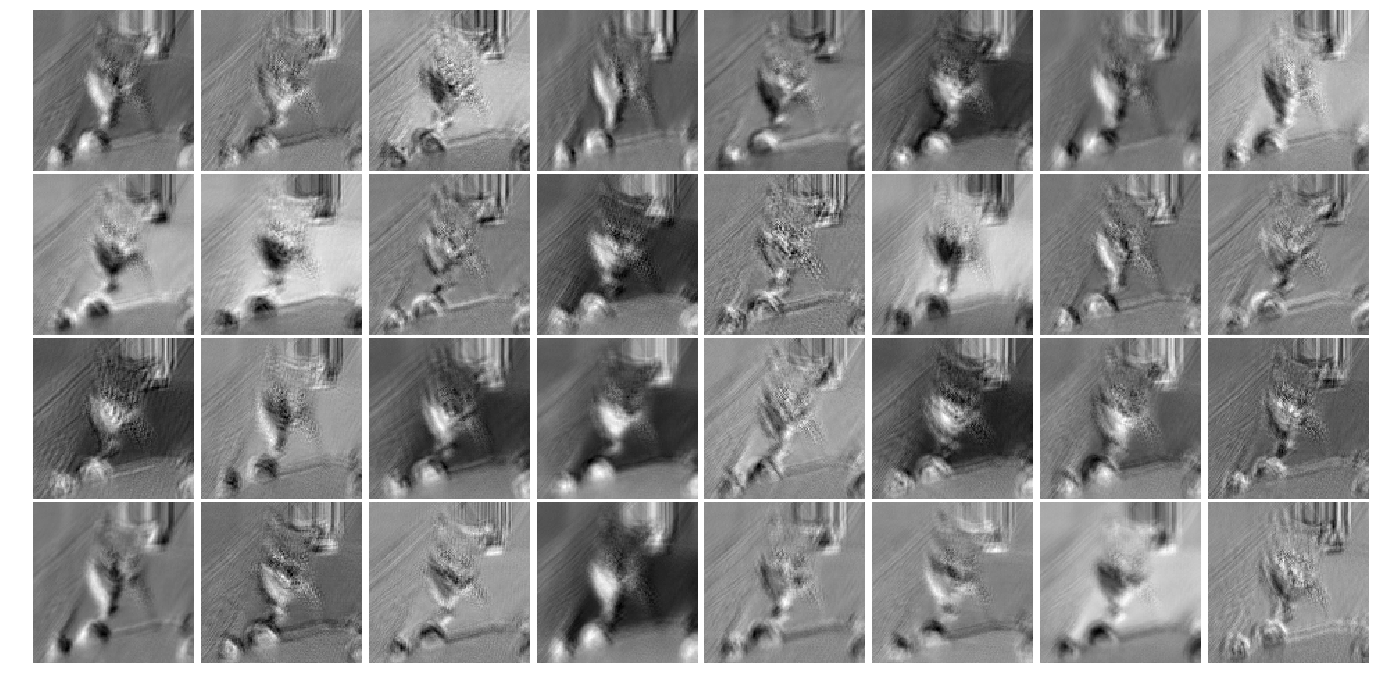

In [26]:
vis = layervis.LayerVis(model, verbose=True)
vis.all_up_to(image_data, last_layer=2);